<a href="https://colab.research.google.com/github/chris051091/Seminario-3/blob/master/distribucion_eventos/src/Distribuci%C3%B3n_eventos_20h_7h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import io
from datetime import timedelta, time, datetime

from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Mounted at /content/drive


In [2]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/dados/'
PATH_FIGURE = '/figure/'
FILE_PALANQUERO = 'eventos_palanquero_2.csv'
FILE_VIZCAINA = 'eventos_vizcaina_2.csv'

In [3]:
dfPalanquero = pd.read_csv(PATH_DRIVE + PATH_DADOS + FILE_PALANQUERO, 
                 sep = ';'
                )

dfPalanquero['FECHA'] = pd.to_datetime(dfPalanquero['date_min_t'], format='%Y %m %d %H %M').dt.tz_localize('America/Bogota')

dfVizcaina = pd.read_csv(PATH_DRIVE + PATH_DADOS + FILE_VIZCAINA, 
                 sep = ';'
                )

dfVizcaina['FECHA'] = pd.to_datetime(dfVizcaina['date_min_t'], format='%Y %m %d %H %M').dt.tz_localize('America/Bogota')

## **Analisis de eventos por horas**

In [11]:
def frequency_events(df):
  df_ = df.copy()

  dfHoras = pd.DataFrame([time(minute = (hora % 4)*15, hour = hora // 4) for hora in range(1, 40, 2)],columns=['HORA_ORD'])

  df_['HORA'] = df_['FECHA'].dt.hour.astype(str).str.zfill(2) + ":" + df_['FECHA'].dt.minute.astype(str)
  dfFreq = df_.groupby(['HORA']).size().to_frame().reset_index(drop = False).rename(columns={0: "Frecuencia"})
  dfFreq['HORA'] = pd.to_datetime(dfFreq['HORA'],format= '%H:%M' )
  dfFreq['HORA_ORD'] = (dfFreq['HORA'] - timedelta(hours = 20)).dt.time
  dfFreq['HORA'] = dfFreq['HORA'].dt.time.astype(str)
  dfFreq = dfFreq.sort_values(by=['HORA_ORD']).reset_index(drop = True)
  dfFreq = dfFreq.merge(dfHoras, on=['HORA_ORD'], how='right')
  dfFreq['HORA'] = (pd.to_datetime(dfFreq['HORA_ORD'].astype(str)) + timedelta(hours = 20)).dt.time.astype(str)
  return dfFreq

def hist_hours(df, name_figure):
  df_ = df.copy()
  df_['HOUR'] = df_['FECHA'].dt.hour
  df_['HORA_ORD'] = (df_['FECHA'] - timedelta(hours = 20))
  df_['HORA_ORD'] = df_['HORA_ORD'].dt.hour
  dfaux = df_[['HOUR', 'HORA_ORD']]
  dfaux = dfaux.drop_duplicates().sort_values(by=['HORA_ORD']).reset_index(drop = True)
  fig, ax = plt.subplots()
  df_['HORA_ORD'].plot(kind='hist', edgecolor='black', color='skyblue', bins = range(0, 12), ax = ax)
  ax.set_xticks(range(0,12))
  ax.set_xticklabels(list(dfaux['HOUR'].astype(str)) + ['7'])

  plt.xlabel('Hora del evento', fontsize= 15)
  plt.ylabel('Número de eventos', fontsize= 15)
  plt.ylim(0,40)
  plt.grid()
  plt.savefig(PATH_DRIVE + f'/histograma_eventos_horaria_20h_7h_{name_figure}.png', format='png', bbox_inches = 'tight' )


def plot_bar_horarios(df, name_figure):
  plt.bar(df['HORA'], df['Frecuencia'])
  plt.xticks(rotation = 90, fontsize= 15)
  plt.ylim(0,40)
  plt.xlabel('Hora del evento', fontsize= 15)
  plt.ylabel('Número de eventos', fontsize= 15)
  plt.savefig(PATH_DRIVE + f'/distribucion_eventos_horaria_20h_7h_{name_figure}.png', format='png', bbox_inches = 'tight' )

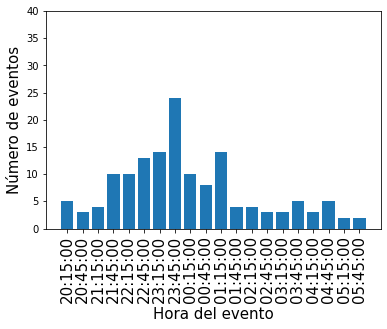

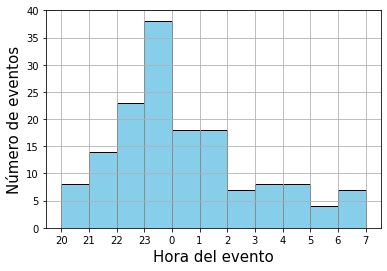

In [12]:
dfPal = frequency_events(dfPalanquero)
plot_bar_horarios(dfPal, "palanquero")
hist_hours(dfPalanquero, "palanquero")

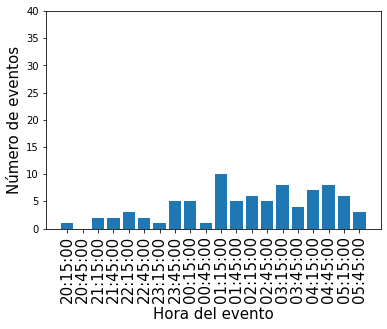

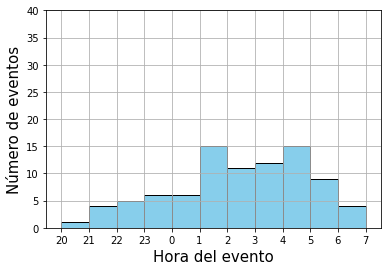

In [13]:
dfViz = frequency_events(dfVizcaina)
plot_bar_horarios(dfViz, "vizcaina")
hist_hours(dfVizcaina, "vizcaina")

## **Comparar fechas entre eventos**

In [7]:
dfPalanquero['HORA_CORRIDA'] = dfPalanquero['FECHA'] - timedelta(hours=20)
dfVizcaina['HORA_CORRIDA'] = dfVizcaina['FECHA'] - timedelta(hours=20)
dfPalanquero['date'] = dfPalanquero['HORA_CORRIDA'].dt.date
dfVizcaina['date'] = dfVizcaina['HORA_CORRIDA'].dt.date
dfDate = dfPalanquero.merge(dfVizcaina, on='date', how='inner', suffixes=("_pal", "_viz"))
dfDate[['FECHA_pal', 'date', 'FECHA_viz']]
# dfPalanquero

,FECHA_pal,date,FECHA_viz
0,2011-06-06 22:15:00-05:00,2011-06-06,2011-06-07 05:15:00-05:00
1,2014-03-12 23:45:00-05:00,2014-03-12,2014-03-13 05:15:00-05:00
2,2013-02-19 23:45:00-05:00,2013-02-19,2013-02-19 21:15:00-05:00
3,2014-05-23 20:45:00-05:00,2014-05-23,2014-05-24 00:15:00-05:00
4,2011-12-04 22:15:00-05:00,2011-12-04,2011-12-05 04:45:00-05:00
